In [1]:
import numpy as np
import pandas as pd
import pickle
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [2]:
def splitData():
    df_train_neg = df_train.loc[df_train['isFraud'] == 0]
    df_train_pos = df_train.loc[df_train['isFraud'] == 1]
    
    split = 0.2
    x_train_pos, x_val_pos = train_test_split(df_train_pos, test_size=split, random_state=42)
    x_train_neg, x_val_neg = train_test_split(df_train_neg, test_size=split, random_state=42)
    
    #downsample the majority to achieve 1:1 class distribution
    x_train_neg = x_train_neg.sample(frac=1/27)
    x_val_neg   = x_val_neg.sample(frac=1/27)
    
    #combine and reshuffle training and validation sets
    x_train = (x_train_pos.append(x_train_neg)).sample(frac=1)
    x_val   = (x_val_pos.append(x_val_neg)).sample(frac=1)
    
    y_train = x_train.pop('isFraud')
    y_val   = x_val.pop('isFraud')
    
    return x_train, x_val, y_train, y_val

READ: 0.5243704319000244 seconds
PREPRO: 0.5980958938598633 seconds
Starting : Logistic_Regression


C:\Users\myneni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


FIT: 22.97298240661621 seconds
SCORE: 0.03194785118103027 seconds
LOGISTIC_REGRESSION
Logistic_Regression scored: 0.7148671295187934
PREDICTION: 0.009003162384033203 seconds
[[3114 1107]
 [1275 2858]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      4221
           1       0.72      0.69      0.71      4133

   micro avg       0.71      0.71      0.71      8354
   macro avg       0.72      0.71      0.71      8354
weighted avg       0.72      0.71      0.71      8354

PROBABILITY PREDICTION: 0.021996259689331055 seconds


C:\Users\myneni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


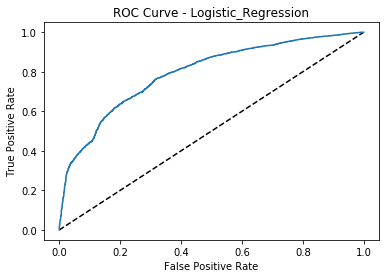

AUC: 0.7926509881434027
FINAL PREDICTION: 0.5945694446563721 seconds
TOTAL for Logistic_Regression : 25.34507966041565 seconds
Starting : Nearest_Neighbors
FIT: 1.8899621963500977 seconds
SCORE: 14.717210531234741 seconds
NEAREST_NEIGHBORS
Nearest_Neighbors scored: 0.7595163993296624
PREDICTION: 14.392464876174927 seconds
[[3183 1038]
 [ 971 3162]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4221
           1       0.75      0.77      0.76      4133

   micro avg       0.76      0.76      0.76      8354
   macro avg       0.76      0.76      0.76      8354
weighted avg       0.76      0.76      0.76      8354

PROBABILITY PREDICTION: 14.25523042678833 seconds


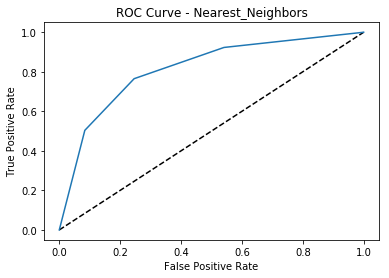

AUC: 0.8143279431996746
FINAL PREDICTION: 947.0537881851196 seconds
TOTAL for Nearest_Neighbors : 993.8246674537659 seconds
Starting : Neural_Net
FIT: 9.134779214859009 seconds
SCORE: 0.020001649856567383 seconds
NEURAL_NET
Neural_Net scored: 0.720253770648791
PREDICTION: 0.020000457763671875 seconds
[[3264  957]
 [1380 2753]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.74      4221
           1       0.74      0.67      0.70      4133

   micro avg       0.72      0.72      0.72      8354
   macro avg       0.72      0.72      0.72      8354
weighted avg       0.72      0.72      0.72      8354

PROBABILITY PREDICTION: 0.0299990177154541 seconds


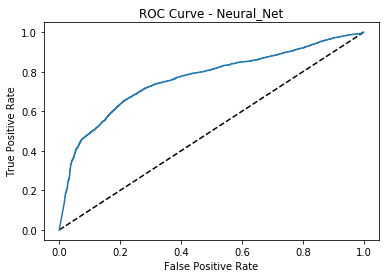

AUC: 0.7649287407856046
FINAL PREDICTION: 1.1150085926055908 seconds
TOTAL for Neural_Net : 12.228838205337524 seconds
Starting : Decision_Tree
FIT: 0.31696534156799316 seconds
SCORE: 0.011000871658325195 seconds
DECISION_TREE
Decision_Tree scored: 0.7693320564998803
PREDICTION: 0.009998798370361328 seconds
[[3422  799]
 [1128 3005]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      4221
           1       0.79      0.73      0.76      4133

   micro avg       0.77      0.77      0.77      8354
   macro avg       0.77      0.77      0.77      8354
weighted avg       0.77      0.77      0.77      8354

PROBABILITY PREDICTION: 0.023000001907348633 seconds


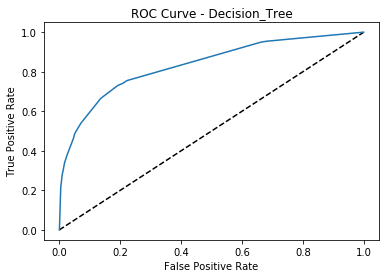

AUC: 0.8337215447081072
FINAL PREDICTION: 0.7740058898925781 seconds
TOTAL for Decision_Tree : 2.9879884719848633 seconds
Starting : Random_Forest
FIT: 0.08805298805236816 seconds
SCORE: 0.015946388244628906 seconds
RANDOM_FOREST
Random_Forest scored: 0.7090016758439072
PREDICTION: 0.01599717140197754 seconds
[[3111 1110]
 [1321 2812]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      4221
           1       0.72      0.68      0.70      4133

   micro avg       0.71      0.71      0.71      8354
   macro avg       0.71      0.71      0.71      8354
weighted avg       0.71      0.71      0.71      8354

PROBABILITY PREDICTION: 0.028001785278320312 seconds


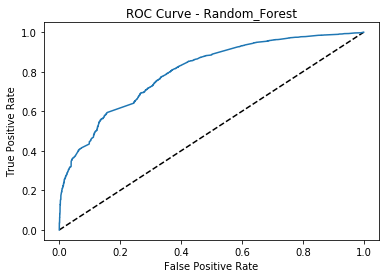

AUC: 0.8014709671487482
FINAL PREDICTION: 1.1480143070220947 seconds
TOTAL for Random_Forest : 3.279059410095215 seconds
Starting : AdaBoost
FIT: 4.875996112823486 seconds
SCORE: 0.10000395774841309 seconds
ADABOOST
AdaBoost scored: 0.7836964328465406
PREDICTION: 0.09499812126159668 seconds
[[3463  758]
 [1049 3084]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      4221
           1       0.80      0.75      0.77      4133

   micro avg       0.78      0.78      0.78      8354
   macro avg       0.79      0.78      0.78      8354
weighted avg       0.78      0.78      0.78      8354

PROBABILITY PREDICTION: 0.10500144958496094 seconds


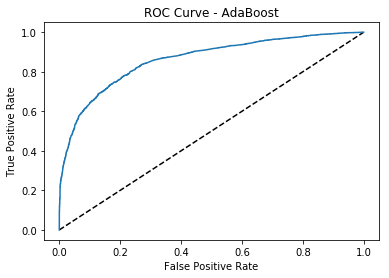

AUC: 0.8613940941313274
FINAL PREDICTION: 7.0270631313323975 seconds
TOTAL for AdaBoost : 13.936157941818237 seconds
Starting : Naive_Bayes
FIT: 0.15597105026245117 seconds
SCORE: 0.037994384765625 seconds
NAIVE_BAYES
Naive_Bayes scored: 0.5644002872875269
PREDICTION: 0.04900050163269043 seconds
[[3583  638]
 [3001 1132]]
              precision    recall  f1-score   support

           0       0.54      0.85      0.66      4221
           1       0.64      0.27      0.38      4133

   micro avg       0.56      0.56      0.56      8354
   macro avg       0.59      0.56      0.52      8354
weighted avg       0.59      0.56      0.52      8354

PROBABILITY PREDICTION: 0.05600166320800781 seconds


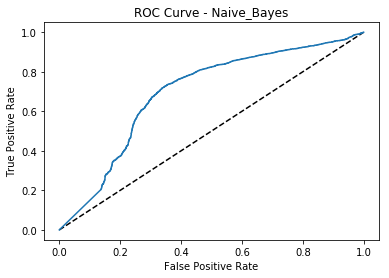

AUC: 0.693118177389297
FINAL PREDICTION: 2.1605610847473145 seconds
TOTAL for Naive_Bayes : 4.523187637329102 seconds
Starting : QDA


C:\Users\myneni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


FIT: 0.29096126556396484 seconds
SCORE: 0.05700111389160156 seconds
QDA
QDA scored: 0.6935599712712474
PREDICTION: 0.06200432777404785 seconds
[[3670  551]
 [2009 2124]]
              precision    recall  f1-score   support

           0       0.65      0.87      0.74      4221
           1       0.79      0.51      0.62      4133

   micro avg       0.69      0.69      0.69      8354
   macro avg       0.72      0.69      0.68      8354
weighted avg       0.72      0.69      0.68      8354

PROBABILITY PREDICTION: 0.05799579620361328 seconds


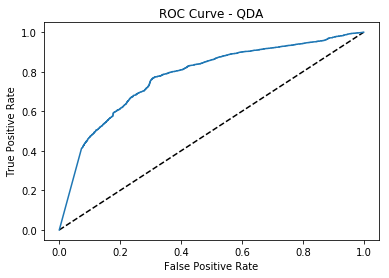

AUC: 0.7786878747873435
FINAL PREDICTION: 2.6631603240966797 seconds
TOTAL for QDA : 5.090780973434448 seconds
Starting : XGBoost
FIT: 79.30718779563904 seconds
SCORE: 0.19900274276733398 seconds
XGBOOST
XGBoost scored: 0.8768254728273881
PREDICTION: 0.19600152969360352 seconds
[[3793  428]
 [ 601 3532]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4221
           1       0.89      0.85      0.87      4133

   micro avg       0.88      0.88      0.88      8354
   macro avg       0.88      0.88      0.88      8354
weighted avg       0.88      0.88      0.88      8354

PROBABILITY PREDICTION: 0.19900059700012207 seconds


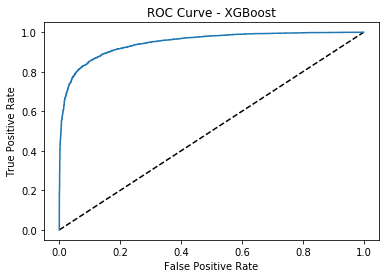

AUC: 0.9473662760133863
FINAL PREDICTION: 7.867857217788696 seconds
TOTAL for XGBoost : 89.58461141586304 seconds


In [3]:
names = [ "Logistic_Regression", "Nearest_Neighbors", 
          "Neural_Net","Decision_Tree", "Random_Forest", 
          "AdaBoost", "Naive_Bayes", "QDA", "XGBoost"]
unusable_classifier_names = ["Gaussian_Process","Linear_SVM", "RBF_SVM"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),    
    MLPClassifier(alpha=1, max_iter=1000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier(n_estimators=500,
                  n_jobs=4,
                  max_depth=9,
                  learning_rate=0.05,
                  subsample=0.9,
                  colsample_bytree=0.9,
                  missing=-999)
]
unusable_classifiers = [
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)
]

#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                           random_state=1, n_clusters_per_class=1)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)
#linearly_separable = (X, y)
start = time.time()
# array of tuples: train and test in each tuple.
with open('df_test_cleaned.pickle','rb') as f:
    df_test = pickle.load(f)
with open('df_train_cleaned.pickle','rb') as g:
    df_train = pickle.load(g)
with open('df_test_transactionids.pickle','rb') as h:
    df_test_transactionids = pickle.load(h)

read = time.time()
print('READ: ' + str(read - start) + ' seconds')
datasets = [(df_train,df_test)]

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
#    X, y = ds
#    X = StandardScaler().fit_transform(X)
#    X_train, X_test, y_train, y_test = \
#        train_test_split(X, y, test_size=.4, random_state=42)

    start2 = time.time()
    X_train, X_test, y_train, y_test = splitData()
    prepro = time.time()
    print('PREPRO: ' + str(prepro - start2) + ' seconds')
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        startloop = time.time()
        print("Starting : " + name)
        clf.fit(X_train, y_train)
        fittime = time.time()
        print('FIT: ' + str(fittime - startloop) + ' seconds')
        score = clf.score(X_test, y_test)
        scoretime = time.time()
        print('SCORE: ' + str(scoretime - fittime) + ' seconds')
        print(name.upper())
        print("===========================")
        print(name + " scored: " + str(score))

        # P R E D I C T
        # Predict the labels of the test set: y_pred
        y_pred = clf.predict(X_test)
        predtime = time.time()
        print('PREDICTION: ' + str(predtime - scoretime) + ' seconds')
        #
        # E V A L U A T E
        #
        # Compute and print the confusion matrix and classification report
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # R O C 
        # Compute predicted probabilities: y_pred_prob
        y_pred_prob = clf.predict_proba(X_test)[:,1]
        prdprobtime = time.time()
        print('PROBABILITY PREDICTION: ' + str(prdprobtime - predtime) + ' seconds')

        # Generate ROC curve values: fpr, tpr, thresholds
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

        # Plot ROC curve
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - ' + name)
        plt.show()        
        
        # AUC Calculations
        # Compute and print AUC score
        print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

        # Compute cross-validated AUC scores: cv_auc
        #X = df_train.drop('isFraud',axis=1)
        #y = df_train['isFraud']
        #cv_auc = cross_val_score(clf,X,y,scoring='roc_auc',cv=5)
        # Print list of AUC scores
        #print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
        
        y_real_pred = clf.predict_proba(df_test)[:,1]
        realpredtime=time.time()
        print('FINAL PREDICTION: ' + str(realpredtime - prdprobtime) + ' seconds')
        results_dict = dict(zip(df_test_transactionids.to_list(),y_real_pred))
        items = results_dict.items()
        results_df = pd.DataFrame({'TransactionID': [i[0] for i in items], 'isFraud': [i[1] for i in items]})
        csv_name = 'results_'+name+'.csv'
        results_df.to_csv(csv_name,index=False)
        fintim = time.time()
        print('TOTAL for ' + name + ' : ' + str(fintim - startloop) + ' seconds')
        print("===========================")
        print("===========================")